<a href="https://colab.research.google.com/github/Xtrmcoder/MachineLearning_Lab/blob/main/Ml_LAB4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [3]:
data = np.array([
    [2.5, 0.5, 1.2],
    [0.3, 4.2, 1.9],
    [4.1, 6.2, 0.7],
    [2.2, 0.5, 3.2],
    [3.1, 2.3, 9.2],
    [1.0, 3.0, 2.1],
    [1.4, 2.3, 3.4],
    [1.1, 0.9, 0.2]

])
df = pd.DataFrame(data, columns=['X', 'Y', 'Z'])
print(df)

     X    Y    Z
0  2.5  0.5  1.2
1  0.3  4.2  1.9
2  4.1  6.2  0.7
3  2.2  0.5  3.2
4  3.1  2.3  9.2
5  1.0  3.0  2.1
6  1.4  2.3  3.4
7  1.1  0.9  0.2


In [4]:
standardized_df = (df - df.mean()) / df.std()

In [6]:
cov_matrix = np.cov(standardized_df.T)

In [7]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [8]:
sorted_indices = np.argsort(eig_vals)[::-1]
sorted_eig_vals = eig_vals[sorted_indices]
sorted_eig_vecs = eig_vecs[:, sorted_indices]

In [9]:
eig_vecs_subset = eig_vecs[:, :2]

In [11]:
reduced_data = standardized_df.to_numpy().dot(eig_vecs_subset)
reduced_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])

In [12]:
print("\nReduced Data (after PCA):\n", reduced_df)


Reduced Data (after PCA):
         PC1       PC2
0 -1.111430 -0.383311
1  1.169915 -0.743061
2 -0.477377  1.850454
3 -0.578320 -0.248797
4  0.580947  1.673656
5  0.517687 -0.566887
6  0.365088 -0.281512
7 -0.466511 -1.300542


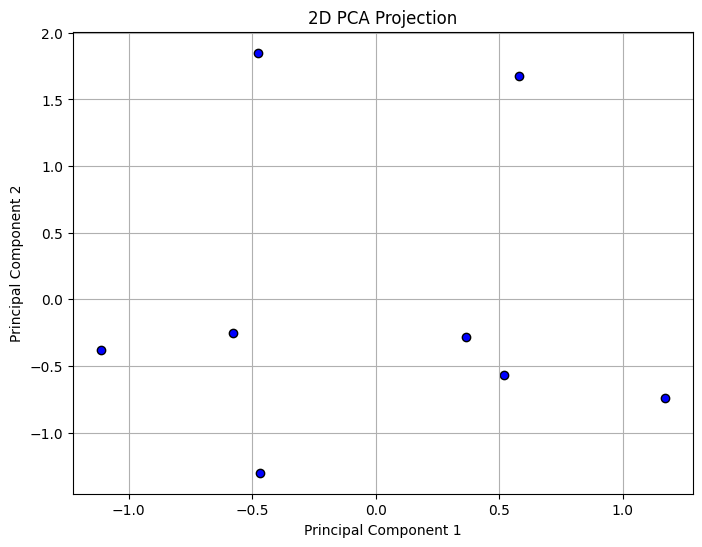

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(reduced_df['PC1'], reduced_df['PC2'], color='blue', edgecolor='k')
plt.title('2D PCA Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()